In [1]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import networkx as nx
import json
# plt.style.use('ggplot')

def graph2json(G,jsonname):

    D = {"neurons":{},"synapses":[],"name":"G"}

    for n,d in G.nodes(True):
        D["neurons"][str(n)] = d

    for u,v,d in G.edges(data=True):
        d.update({"from":u,"to":v})
        D["synapses"].append( d )


    with open(jsonname,"w") as fp:
        json.dump(D,fp)



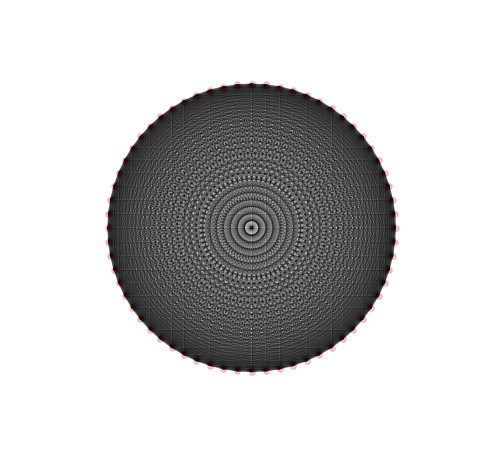

In [9]:
plt.figure(figsize=(6,6))
N = 64
G = nx.generators.complete_graph(N)
nx.draw_circular(G,node_size=30,alpha=0.2)
nx.set_node_attributes(G, 'dc', 50)
nx.set_edge_attributes(G,'weight',20)
graph2json(G,"all64.json")

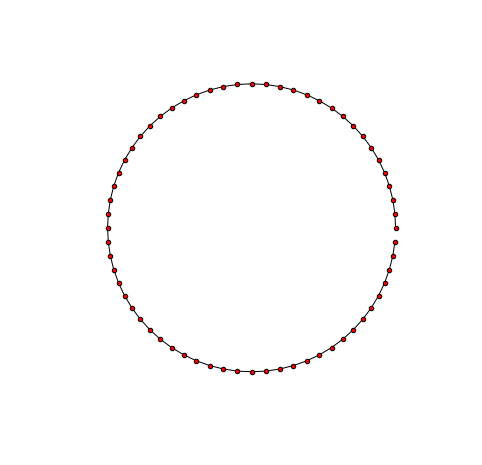

In [3]:
plt.figure(figsize=(6,6))
N = 64
G = nx.generators.cycle_graph(N)
G.remove_edge(63,0)
nx.set_node_attributes(G, 'dc', 0)
nx.set_edge_attributes(G,'weight',80)
G.node[0]['dc'] = 100
nx.draw_circular(G,node_size=20)
graph2json(G,"circular.json")

64
62


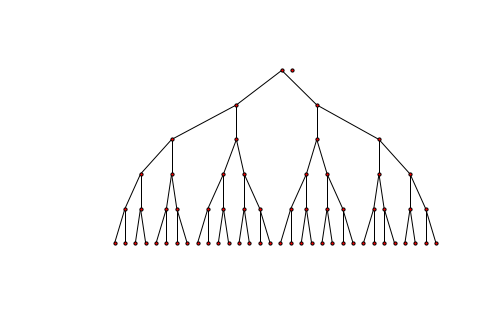

In [16]:
from networkx.drawing.nx_agraph import graphviz_layout

N = 64
G = nx.generators.balanced_tree(2,5)
nx.set_node_attributes(G, 'dc', 0)
nx.set_edge_attributes(G,'weight',80)
G.node[0]['dc'] = 100
G.add_node(63)
plt.figure()

pos=graphviz_layout(G,prog='dot')
nx.draw(G,pos,with_labels=False,arrows=False,node_size=10)

print(G.number_of_nodes())
print(G.number_of_edges())

graph2json(G,"tree.json")

In [5]:
import pygraphviz